# Exercise 3: PCA and Random Projections
### Due June 25 at 14:00

Please note: 

- Read the instructions in the exercise PDF and in this notebook carefully.
- Add your solutions *only* at `YOUR CODE HERE`/`YOUR ANSWER HERE` and remove the corresponding `raise NotImplementedError()`.
- Do not chance the provided code and text, if not stated.
- Do not *add* or *delete* cells.
- Do not `import` additional functionality. 
- Before submitting: Please make sure, that your notebook can be executed from top to bottom `Menu -> Kernel -> Restart & Run all`. 

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from numpy.testing import assert_equal, assert_almost_equal
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.random_projection import GaussianRandomProjection
from sklearn.decomposition import PCA

In [2]:
# load the USPS dataset
usps_df = pd.read_csv('USPS.csv', sep='\t',)
xs_usps = usps_df.drop(['Label'], axis=1).values
ys_usps = usps_df['Label'].values

xs_usps.shape, ys_usps.shape

((1000, 256), (1000,))

#### Here you can implement PCA and Random Projections yourself. This will be awarded with 1.5 bonus points per method. If you decide to do so, you have to use your implementation in this exercise. If you do not want to implement this, simply remove the NotImplementedError().

In [3]:
def pca_alg(data, dims):
    # Center data
    data_ = data - np.mean(data, axis=0)
    
    # Compute covariance matrix
    C = data_.T @ data
    
    # Perform eigendecompositon of the covariance matrix
    evals, evecs = np.linalg.eig(C)
    
    # Sort eigenvectors and eigenvalues in increasing order
    order = np.argsort(evals)
    evals = evals[order]
    evecs = evecs[order, :]
    evecs = evecs[:, order]
    
    # Sanity check whether orthogonality still holds
    print(np.sum(evecs @ evecs.T))
    
    # Get components with highest variance
    lmbda = np.diag(evals[-dims:])
    proj = evecs[:, -dims:]
    
    data = data[:, order]
    
    return - data @ proj

### (a) Reduce the dataset's dimensionality to d=2

256.00000000000114


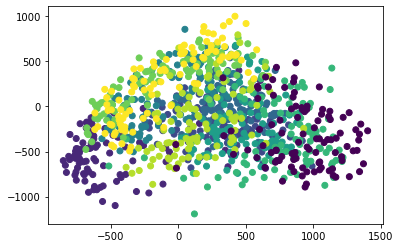

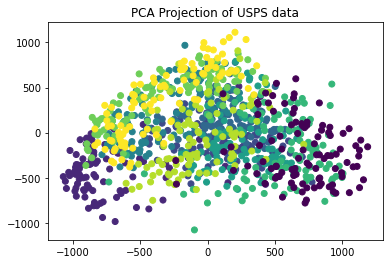

In [4]:
xs_usps_pca = pca_alg(xs_usps, 2) # an np.array of shape 1000x2

plt.figure()
plt.scatter(xs_usps_pca[:, 1], xs_usps_pca[:, 0], c=ys_usps)
plt.show()

# YOUR CODE HERE
pca = PCA(n_components=2)
xs_usps_pca = pca.fit_transform(xs_usps)
plt.figure()
plt.scatter(*xs_usps_pca.T, c=ys_usps)
plt.title('PCA Projection of USPS data')
plt.show()

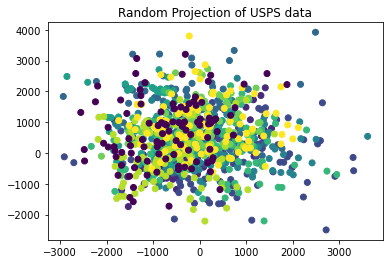

In [5]:
xs_usps_random = ... # an np.array of shape 1000x2

# YOUR CODE HERE
transformer = GaussianRandomProjection(n_components = 2)
xs_usps_random = transformer.fit_transform(xs_usps)
plt.scatter(*xs_usps_random.T, c=ys_usps)
plt.title('Random Projection of USPS data')
plt.show()

In [13]:
transformer.components_.shape

(2, 256)

### (b) Visualize prinicipal components and random directions

C:\Users\Maverick\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


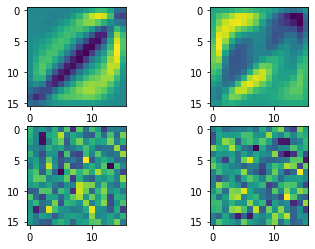

In [14]:
fig, axis = plt.subplots(2, 2)

# YOUR CODE HERE
pca_components = pca.components_.T

axis[0,0].imshow(pca_components[:,0].reshape(16,16))
axis[0,1].imshow(pca_components[:,1].reshape(16,16))

random_components = transformer.components_.T

axis[1,0].imshow(random_components[:,0].reshape(16,16))
axis[1,1].imshow(random_components[:,1].reshape(16,16))

fig.show()

### (c) Reconstruct a random projection

In [7]:
def reconstruct(xs_original, xs_projected):
    ''' Returns: A np.array of the same shape as xs_original
    '''
    #Assuming W is given then
    orig_d = xs_original.shape[1]
    n, d = xs_projected.shape
    temp = np.zeros((d, d))
    temp1 = np.zeros((orig_d, d))
    for i in range(n):
        temp += np.outer(xs_projected[i], xs_projected[i])
        temp1 += np.outer(xs_original[i], xs_projected[i])
    U = temp1 @ np.linalg.pinv(temp)
    
    return xs_projected @ U.T
    

In [8]:
xs_usps.shape

(1000, 256)

In [9]:
np.random.seed(42)
W = np.random.normal(size=(256,2))/np.sqrt(2)
xs_reconstructed = reconstruct(xs_usps, xs_usps @ W)
assert_almost_equal(np.linalg.norm(xs_reconstructed), 28102.566390212647)

### (d) Visualize reconstructed images in feature space

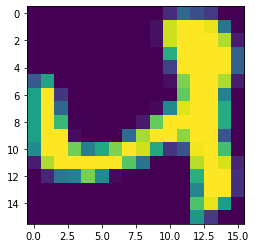

In [10]:
# we want to reconstruct digit number 100 - visualize it
digit = xs_usps[100,:]
plt.imshow(digit.reshape(16, 16))
plt.show()

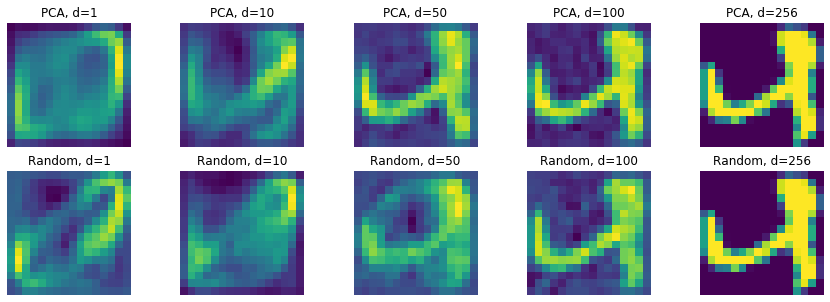

In [11]:
dimensions = [1, 10, 50, 100, 256]
fig, axis = plt.subplots(2, 5, figsize=(15,5))

for idx, dim in enumerate(dimensions):
    # YOUR CODE HERE
    pca = PCA(n_components=dim)
    xs_usps_pca = pca.fit_transform(xs_usps)
    xs_usps_pca_reconstruct = pca.inverse_transform(xs_usps_pca)
    

    transformer = GaussianRandomProjection(n_components = dim)
    xs_usps_random = transformer.fit_transform(xs_usps)
    xs_usps_random_reconstruct = reconstruct(xs_usps, xs_usps_random)
    
    axis[0, idx].imshow(xs_usps_pca_reconstruct[100,:].reshape(16, 16))
    axis[1, idx].imshow(xs_usps_random_reconstruct[100,:].reshape(16, 16))
    
    # axis[0, idx].imshow( pca reconstruction of image 100 for the given dimension )
    # axis[1, idx].imshow( random projection reconstruction of image 100 for the given dimension )
    axis[0, idx].set_title(f'PCA, d={dim}')
    axis[0, idx].axis('off')
    axis[1, idx].set_title(f'Random, d={dim}')
    axis[1, idx].axis('off')

plt.show()

### (e) Reconstruction Error of PCA and Random Projections

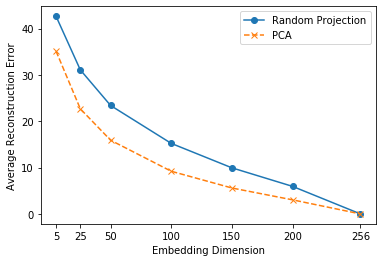

In [12]:
dimensions = [5, 25, 50, 100, 150, 200, 256]

errors_pca = [] 
errors_random = []
# YOUR CODE HERE
for dim in dimensions:
    n = xs_usps.shape[0]
    pca = PCA(n_components=dim)
    xs_usps_pca = pca.fit_transform(xs_usps)
    xs_usps_pca_reconstruct = pca.inverse_transform(xs_usps_pca)
    errors_pca.append(np.linalg.norm(xs_usps - xs_usps_pca_reconstruct)/n)

    transformer = GaussianRandomProjection(n_components = dim)
    xs_usps_random = transformer.fit_transform(xs_usps)
    xs_usps_random_reconstruct = reconstruct(xs_usps, xs_usps_random)
    errors_random.append(np.linalg.norm(xs_usps - xs_usps_random_reconstruct)/n)
    

plt.plot(dimensions, errors_random, 'o-', label='Random Projection')
plt.plot(dimensions, errors_pca, 'x--', label='PCA')
plt.xlabel('Embedding Dimension')
plt.xticks(dimensions)
plt.ylabel('Average Reconstruction Error')
plt.legend(loc='best')
plt.show()

### (f) Average and maximum distortion of distances

In [13]:
def pairwise_distortions(xs_orig, xs_new):
    # YOUR CODE HERE
    np.seterr(divide='ignore', invalid='ignore')
    d_orig = euclidean_distances(xs_orig)
    d_new = euclidean_distances(xs_new)
    A  = d_orig / d_new
    A = A[~np.eye(A.shape[0],dtype=bool)].reshape(A.shape[0],-1)
    return np.maximum(A, 1/A)
    
def average_distortion(xs_orig, xs_new):
    return pairwise_distortions(xs_orig, xs_new).mean()
    
def maximum_distortion(xs_orig, xs_new):
    return pairwise_distortions(xs_orig, xs_new).max()

In [14]:
xs_orig = np.arange(10).reshape(-1, 1)
xs_new = xs_orig * xs_orig

assert_almost_equal(average_distortion(xs_orig, xs_orig), 1.)
assert_almost_equal(maximum_distortion(xs_new, xs_new), 1.)
assert_almost_equal(average_distortion(xs_orig, xs_new), 9.)
assert_almost_equal(maximum_distortion(xs_orig, xs_new), 17.)

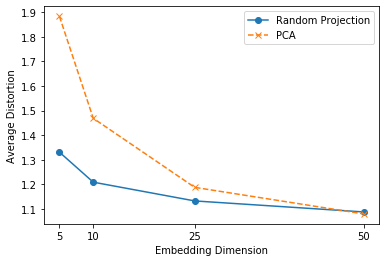

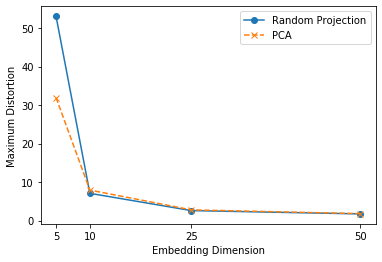

In [15]:
dimensions = [5, 10, 25,  50]

avg_distortion_pca = []
avg_distortion_random = []
# YOUR CODE HERE

for dim in dimensions:
    n = xs_usps.shape[0]
    pca = PCA(n_components=dim)
    xs_usps_pca = pca.fit_transform(xs_usps)
    avg_distortion_pca.append(average_distortion(xs_usps, xs_usps_pca))

    transformer = GaussianRandomProjection(n_components = dim)
    xs_usps_random = transformer.fit_transform(xs_usps)
    avg_distortion_random.append(average_distortion(xs_usps, xs_usps_random))


plt.plot(dimensions, avg_distortion_random, 'o-', label='Random Projection')
plt.plot(dimensions, avg_distortion_pca, 'x--', label='PCA')
plt.xlabel('Embedding Dimension')
plt.xticks(dimensions)
plt.ylabel('Average Distortion')
plt.legend(loc='best')
plt.show()

max_distortion_pca = []
max_distortion_random = []

for dim in dimensions:
    n = xs_usps.shape[0]
    pca = PCA(n_components=dim)
    xs_usps_pca = pca.fit_transform(xs_usps)
    max_distortion_pca.append(maximum_distortion(xs_usps, xs_usps_pca))

    transformer = GaussianRandomProjection(n_components = dim)
    xs_usps_random = transformer.fit_transform(xs_usps)
    max_distortion_random.append(maximum_distortion(xs_usps, xs_usps_random))

plt.plot(dimensions, max_distortion_random, 'o-', label='Random Projection')
plt.plot(dimensions, max_distortion_pca, 'x--', label='PCA')
plt.xlabel('Embedding Dimension')
plt.xticks(dimensions)
plt.ylabel('Maximum Distortion')
plt.legend(loc='best')
plt.show()


### (g) Summarize the advantages and disadvantages of PCA and Random Projections

<font color="blue">The results presented in (d) suggest that PCA performs better than Random Projection. However, the plots in (e) are rather inconclusive and the performance measure in this case depend on whether we care more about the average or maximum distortion.</font>